## 911 Calls Data Project

For this project, we will be analyzing 911 call data from https://www.kaggle.com/mchirico/montcoalert. The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)
First, Please download 922.csv File


## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import matplotlib.pyplot and seaborn visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv(r"D:\Ethans\DataScience\CourseMaterials\911CallsDataProject\911.csv")

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [25]:
df.dropna()['zip'].value_counts().head(5)

19401.0    22130
19464.0    21586
19403.0    16488
19446.0    15793
19406.0    10797
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [27]:
df.dropna()['twp'].value_counts().head(5)

LOWER MERION    23882
ABINGTON        19293
NORRISTOWN      17582
POTTSTOWN       13226
CHELTENHAM      13013
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [31]:
len(df['title'].unique())

133

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [35]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [36]:
df['Reason'].value_counts().head(5)

EMS        161441
Traffic    116065
Fire        48919
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

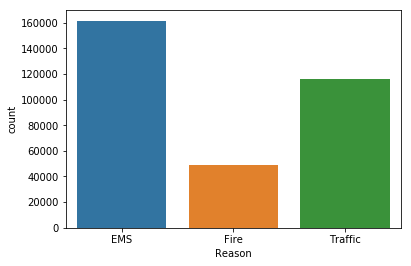

In [40]:
sns.countplot(df['Reason']);

___
** What is the data type of the objects in the timeStamp column? **

In [65]:
type(df['timeStamp'].iloc[0])

str

** Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [66]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [69]:
time = df['timeStamp'].iloc[0]


17

** We can grab specific attributes from a Datetime object like -**

    time = df['timeStamp'].iloc[0]
    time.hour

**Use .apply() Method, to create 3 new columns called Hour, Month, and Day of Week. 
You will create these columns based off the timeStamp column.**

In [70]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


** Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


** Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

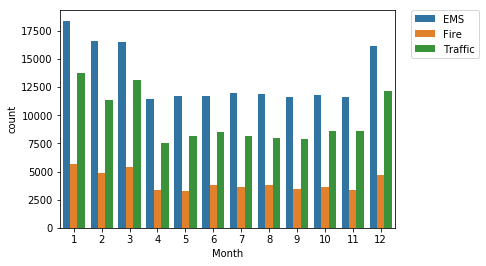

In [94]:
sns.countplot(x='Month',data=df,hue='Reason')
# Relocation of the legends outside
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Now do the same for Month:**

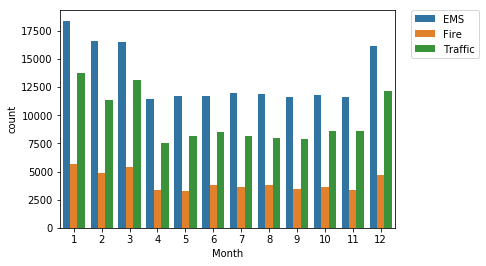

In [19]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
# Relocation of the legends outside
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [100]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [101]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444
2015-12-15,419,419,419,380,419,419,418,419,419,419,419,419,419
2015-12-16,376,376,376,343,376,376,376,376,376,376,376,376,376
2015-12-17,387,387,387,336,387,387,387,387,387,387,387,387,387
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


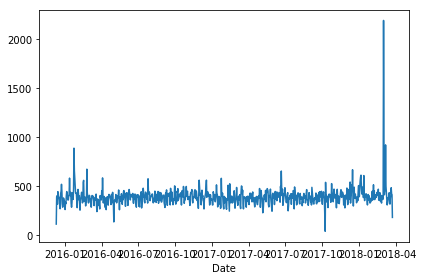

In [102]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

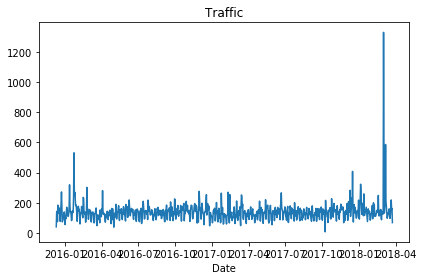

In [103]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title("Traffic")
plt.tight_layout()

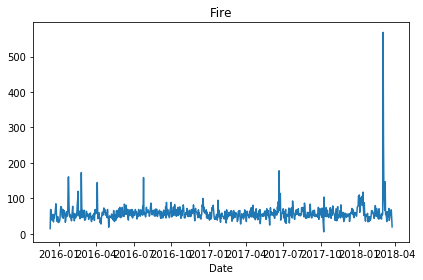

In [105]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title("Fire")
plt.tight_layout()

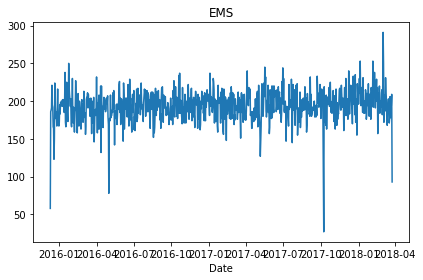

In [106]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title("EMS")
plt.tight_layout()

____
** Let's try to create  heatmaps with seaborn and our data. But, first we will need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 
There are lots of ways to do this, but let's try to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. **

In [114]:
df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
1,842,698,625,598,634,858,1386,2269,2853,2764,...,2937,3149,3335,3286,2918,2283,1960,1660,1329,1025
2,805,738,620,626,560,798,1382,2319,2751,2744,...,3095,3211,3413,3435,2782,2296,2064,1682,1422,1103
3,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120
4,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
5,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
6,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177


In [108]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack() ##Here, we can also use pivot method
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,931,732,663,585,683,862,1291,2175,2714,2766,...,2729,3034,3082,3116,2729,2179,1912,1503,1303,1003
1,842,698,625,598,634,858,1386,2269,2853,2764,...,2937,3149,3335,3286,2918,2283,1960,1660,1329,1025
2,805,738,620,626,560,798,1382,2319,2751,2744,...,3095,3211,3413,3435,2782,2296,2064,1682,1422,1103
3,871,690,727,603,573,833,1386,2254,2613,2719,...,2863,3044,3017,3335,2707,2226,1974,1724,1360,1120
4,896,789,701,644,633,786,1286,2087,2487,2570,...,3290,3562,3726,3596,2858,2562,2205,1916,1765,1396
5,1130,999,908,767,742,788,957,1295,1674,2132,...,2643,2563,2529,2525,2477,2320,2074,1839,1579,1469
6,1159,1026,955,800,717,736,880,1196,1492,1849,...,2276,2170,2200,2234,2179,2067,1753,1536,1235,1177


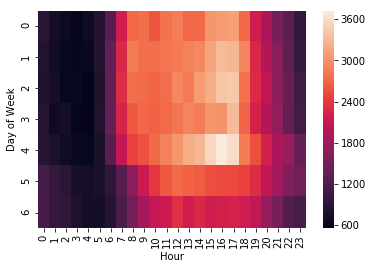

In [116]:
sns.heatmap(dayHour)

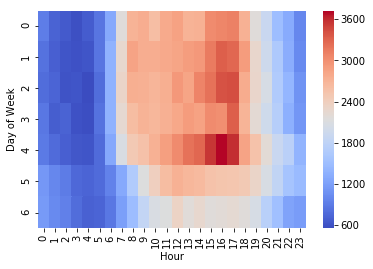

In [118]:
sns.heatmap(dayHour,cmap='coolwarm')

** Now create a HeatMap using this new DataFrame. **

** Now create a clustermap using this DataFrame. **

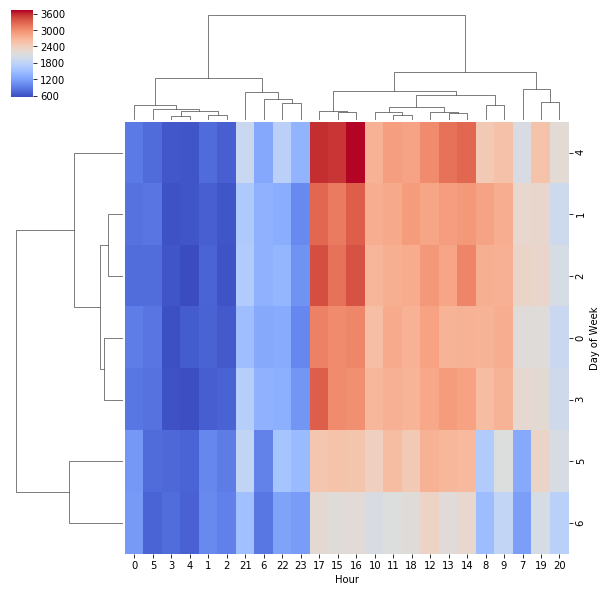

In [119]:
sns.clustermap(dayHour,cmap='coolwarm')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [120]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
0,5716,5214,4313,3088,3538,3264,3687,3325,3031,4250,3262,4286
1,6118,4755,4752,3065,3991,3376,3213,4044,3142,3689,3891,4691
2,5488,5066,5693,3003,3653,3880,3198,4016,3191,3338,4067,4477
3,4985,4708,5601,3097,3289,4095,3248,3507,3702,3189,3478,4899
4,5532,4848,7005,3574,3278,3747,3736,3297,4226,3433,3377,5570


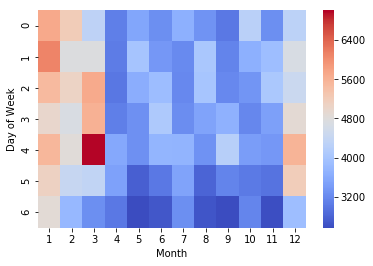

In [121]:
sns.heatmap(dayMonth,cmap='coolwarm')

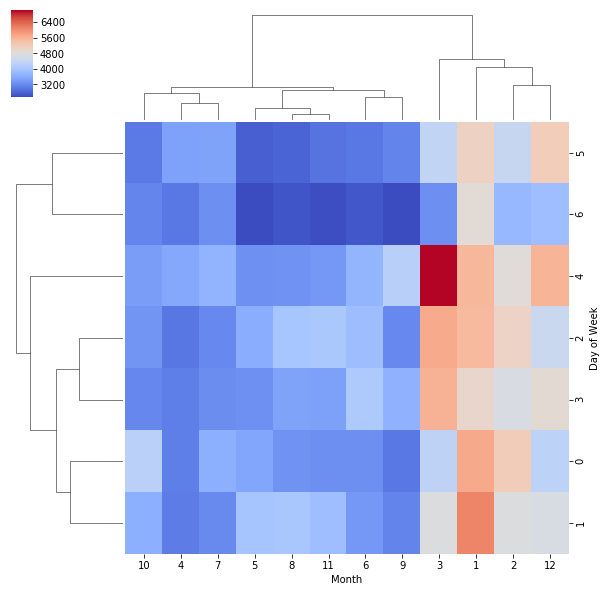

In [122]:
sns.clustermap(dayMonth,cmap='coolwarm')